# Präsentation der erzielten Ergebnisse

Alle Imports bitte hier inkludieren:

In [9]:
import sys
import os
import pandas as pd
# Wir holen uns den Pfad des aktuellen Notebooks
notebook_path = os.getcwd()

# Wir prüfen, ob wir schon im Projekt-Root sind oder das 'src' suchen müssen
if 'src' not in os.listdir(notebook_path):
    # Falls wir z.B. in einem Unterordner 'notebooks' wären (hier nicht der Fall, aber sicher ist sicher)
    # Gehe einen Schritt hoch
    project_root = os.path.abspath(os.path.join(notebook_path, '..'))
    sys.path.append(project_root)
else:
    # Wir sind direkt neben 'src', also fügen wir den aktuellen Pfad hinzu
    sys.path.append(notebook_path)

# Test-Print: Wo suchen wir jetzt?
print(f"Python sucht jetzt auch in: {sys.path[-1]}")
from src.visualization.plots import _plot_correlation_heatmap, _prepare_data, _plot_clustermap
from src.visualization.plots import plot_histogram_overview, plot_answer_distributions
from src.config import ORIGINAL_BEHAVIOR_DATASET_CSV
from src.analysis.analysis import calculate_statistic_significance, calculate_vif_per_questionnaire
from src.processing.metadata import attach_metadata_as_multiindex, split_df_by_questionnaire
from src.processing.data_loader import load_data

Python sucht jetzt auch in: d:\CS Studium\AIN67\HiTop\Code\hitop-classification-models


In [10]:
from typing import Dict

def split_dataframe_auto(df: pd.DataFrame) -> Dict[str, pd.DataFrame]:
    """
    Trennt einen großen DataFrame basierend auf Namensmustern in einzelne Fragebögen.
    """
    
    # 1. Definition der Suchmuster (Teilstrings im Spaltennamen)
    patterns = {
        "SAS":  "sasai",
        "PHQ":  "phqai",
        "OPD":  "opdai",
        "IIP":  "iipai",
        "HEA":  "heaai",
        "ECR":  "ecrai",
        "BADA": "bada",   # Fängt 'badai' UND 'badavorh'
    }

    result_dfs = {}
    assigned_cols = set()

    # 2. Fragebögen extrahieren
    for name, pattern in patterns.items():
        # Suche Spalten, die das Muster enthalten (z.B. 'z_sasai036' enthält 'sasai')
        cols = [col for col in df.columns if pattern in str(col).lower()]
        
        if cols:
            result_dfs[name] = df[cols].copy()
            assigned_cols.update(cols)

    # 3. Den Rest als 'Metadaten' speichern (Gender, Diag, Code, Zufallszahl...)
    metadata_cols = [col for col in df.columns if col not in assigned_cols]
    if metadata_cols:
        result_dfs["Metadaten"] = df[metadata_cols].copy()

    return result_dfs

# --- Test & Verwendung ---

# Liste deiner Spalten (als String simuliert)
columns_str = "z_sasai036;z_sasai035;z_phqai60;Gender;Code;Zufallszahl;badai605;z_opdai012"
columns = columns_str.split(";")

# Dummy DataFrame erstellen
df_complete = pd.DataFrame(columns=columns)

# Funktion aufrufen
dfs = split_dataframe_auto(df_complete)

# Ergebnis prüfen
for name, sub_df in dfs.items():
    print(f"📦 {name}: {sub_df.shape[1]} Spalten")
    # print(sub_df.columns.tolist()) # Zum Prüfen einkommentieren


📦 SAS: 2 Spalten
📦 PHQ: 1 Spalten
📦 OPD: 1 Spalten
📦 BADA: 1 Spalten
📦 Metadaten: 3 Spalten


## 1. Visualisierung des neuen Datensatzes via Heatmap (Verhaltensfragebogen mit Zufallsvariable)


🔎 VIF ANALYSE (MULTIKOLLINEARITÄT)


C:\Users\valut\AppData\Local\Temp\ipykernel_22216\4238224157.py:44: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", decimal=",", skipinitialspace=True)



➡️  Fragebogen: SAS (Gesamt: 36 Items)
   ⚠️  36 von 36 Items mit VIF > 1
   Variable             | VIF       
   --------------------------------
   z_sasai031           | 3.33      
   z_sasai009           | 3.04      
   z_sasai010           | 2.85      
   z_sasai006           | 2.78      
   z_sasai018           | 2.76      
   z_sasai011           | 2.39      
   z_sasai035           | 2.36      
   z_sasai016           | 2.34      
   z_sasai024           | 2.32      
   z_sasai007           | 2.26      
   z_sasai005           | 2.18      
   z_sasai021           | 2.14      
   z_sasai032           | 2.01      
   z_sasai013           | 1.95      
   z_sasai012           | 1.94      
   z_sasai019           | 1.93      
   z_sasai003           | 1.90      
   z_sasai020           | 1.85      
   z_sasai036           | 1.81      
   z_sasai025           | 1.77      
   z_sasai015           | 1.77      
   z_sasai001           | 1.77      
   z_sasai017           | 1.76      
 

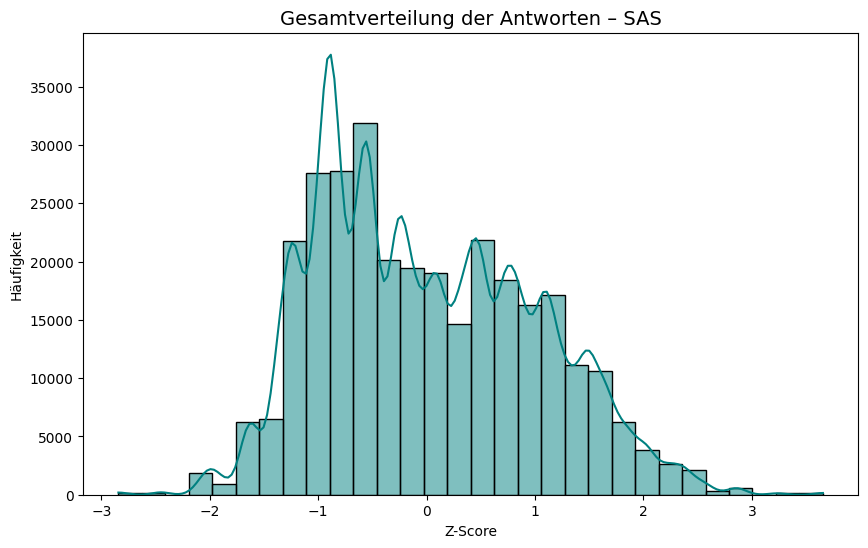

d:\CS Studium\AIN67\HiTop\Code\hitop-classification-models\src\visualization\plots.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


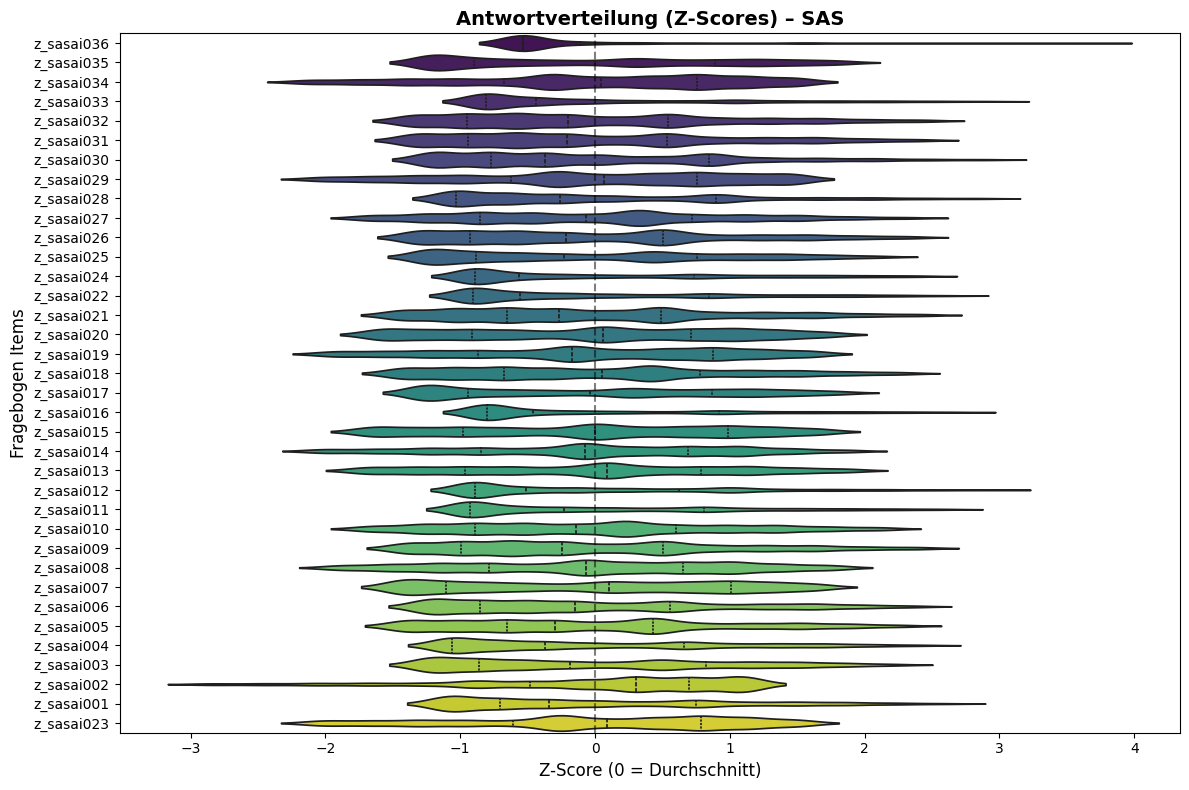

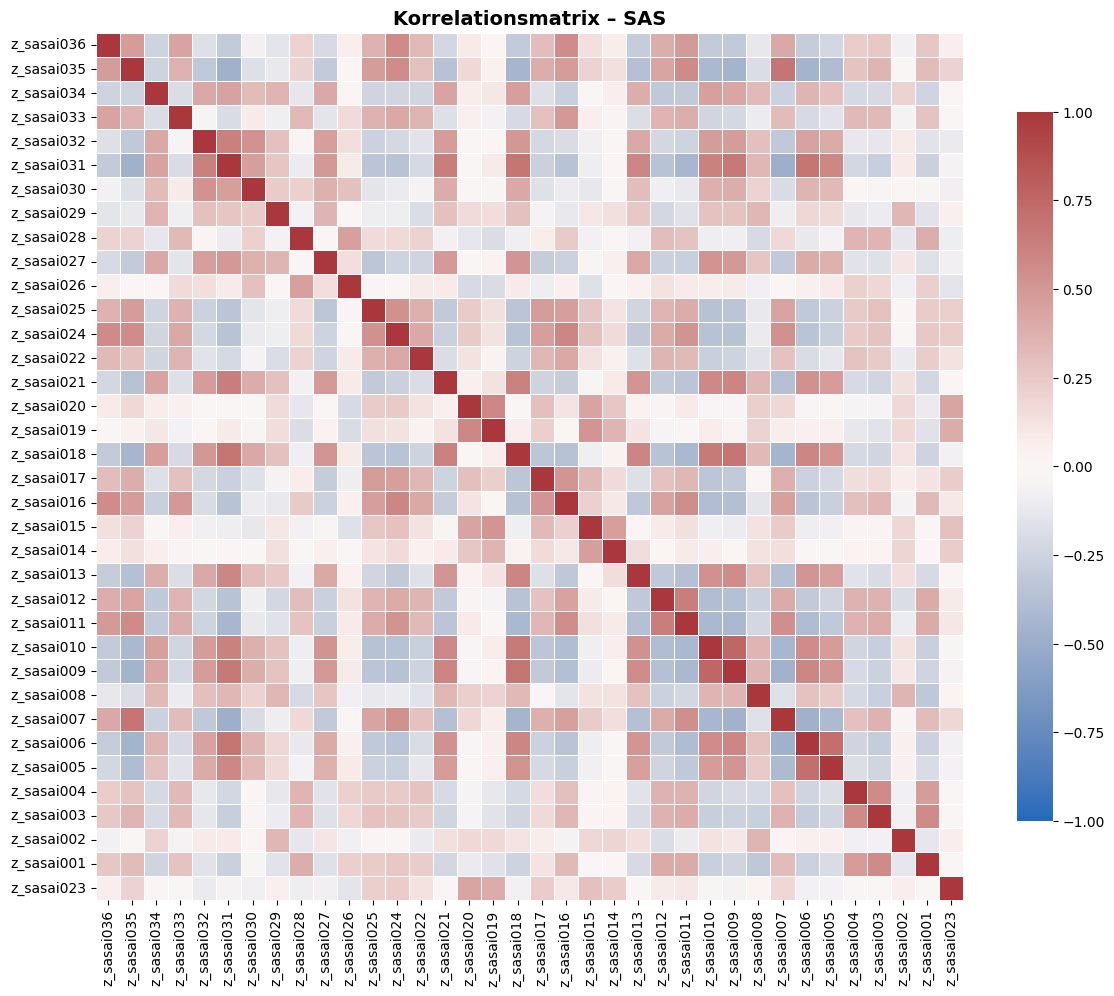

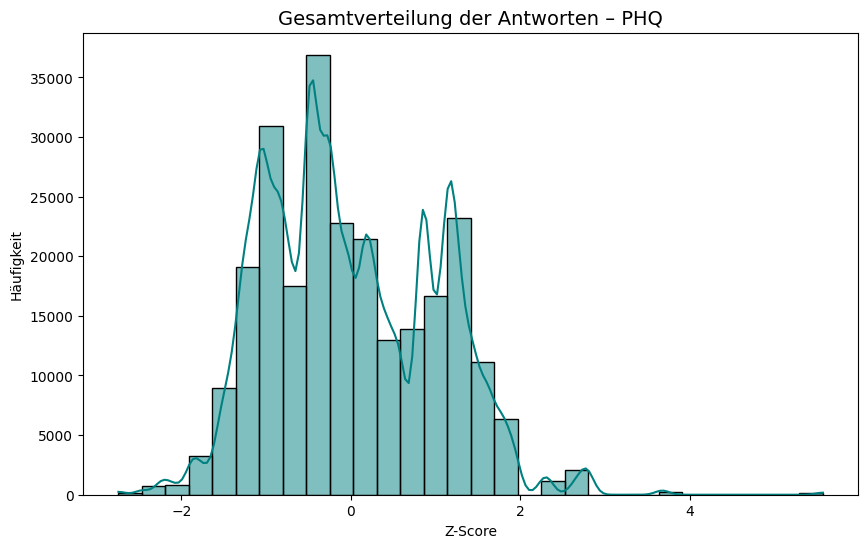

d:\CS Studium\AIN67\HiTop\Code\hitop-classification-models\src\visualization\plots.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


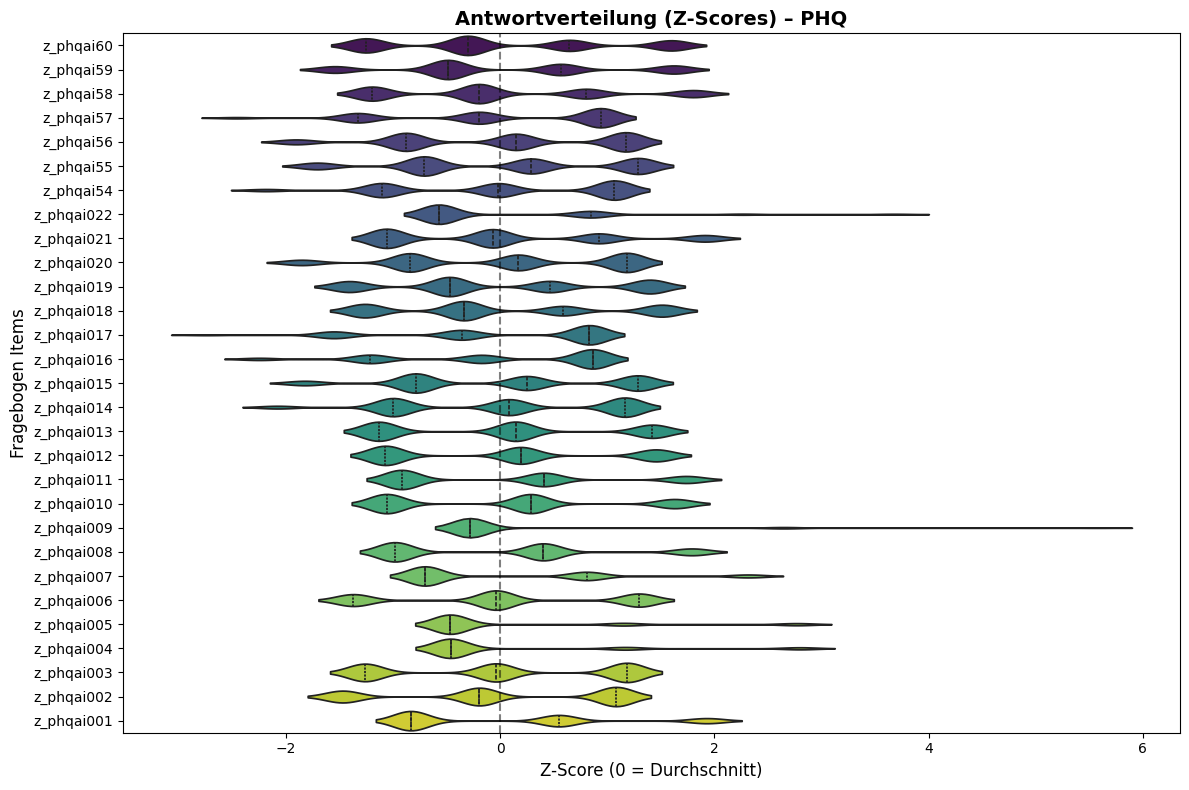

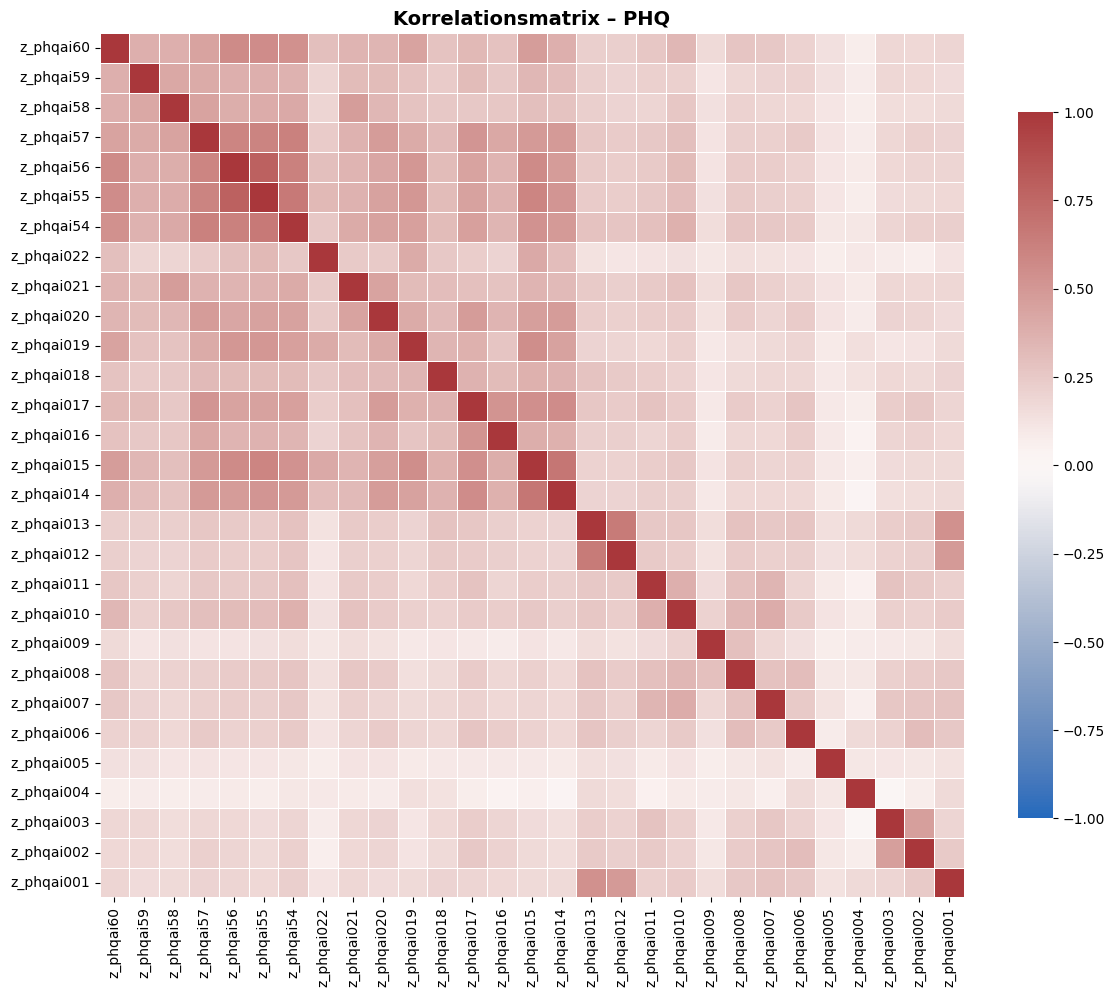

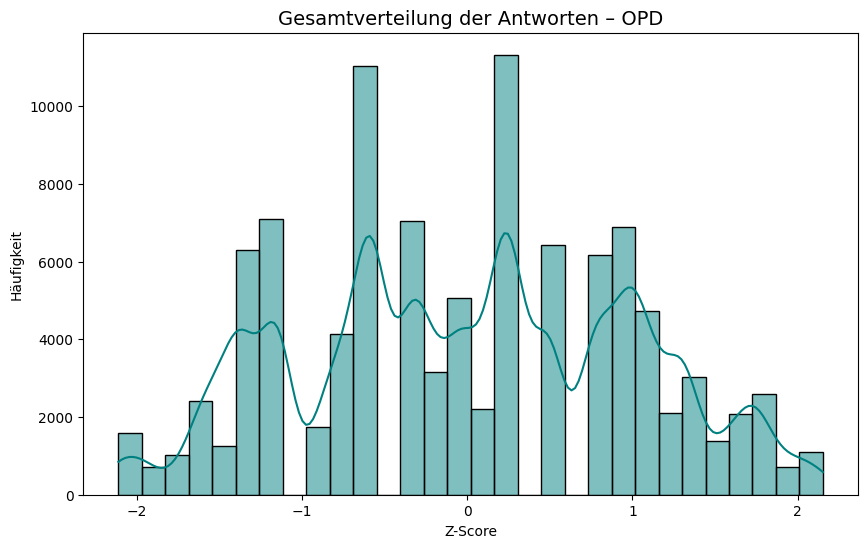

d:\CS Studium\AIN67\HiTop\Code\hitop-classification-models\src\visualization\plots.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


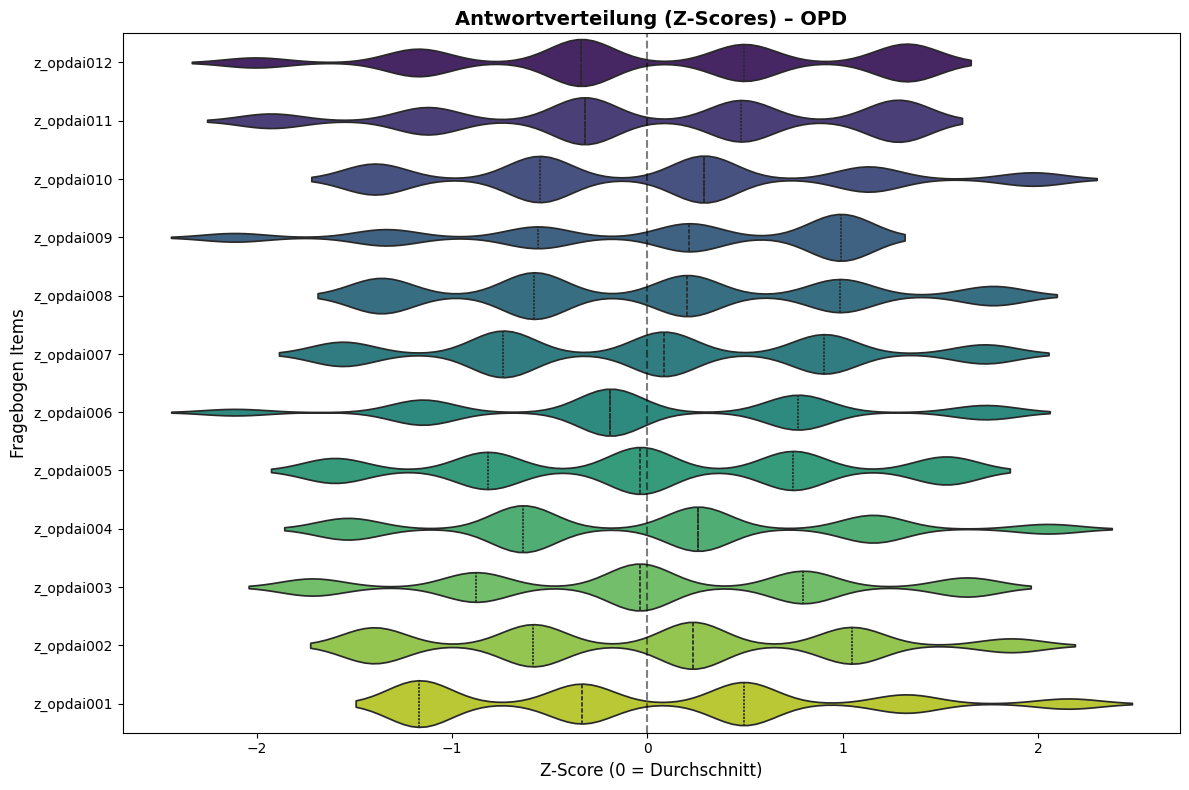

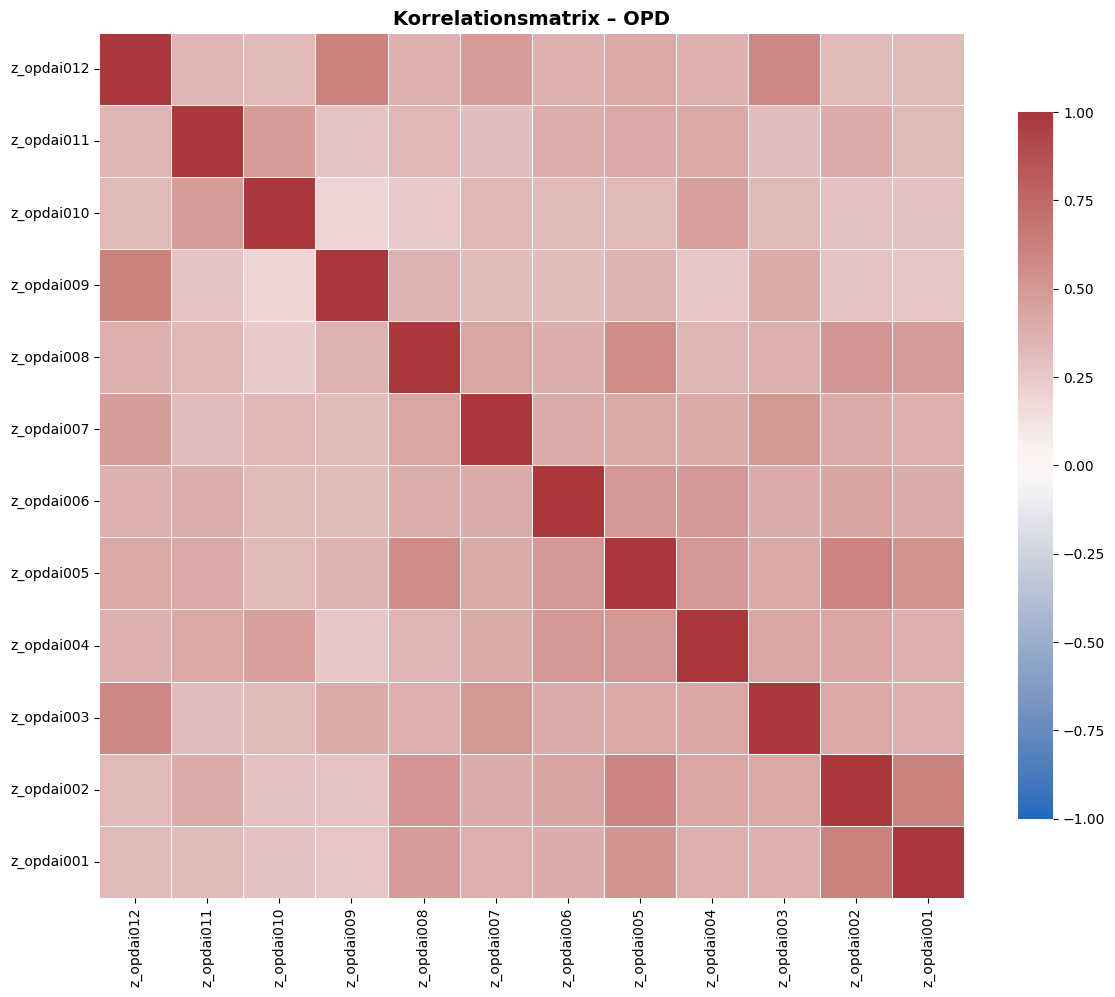

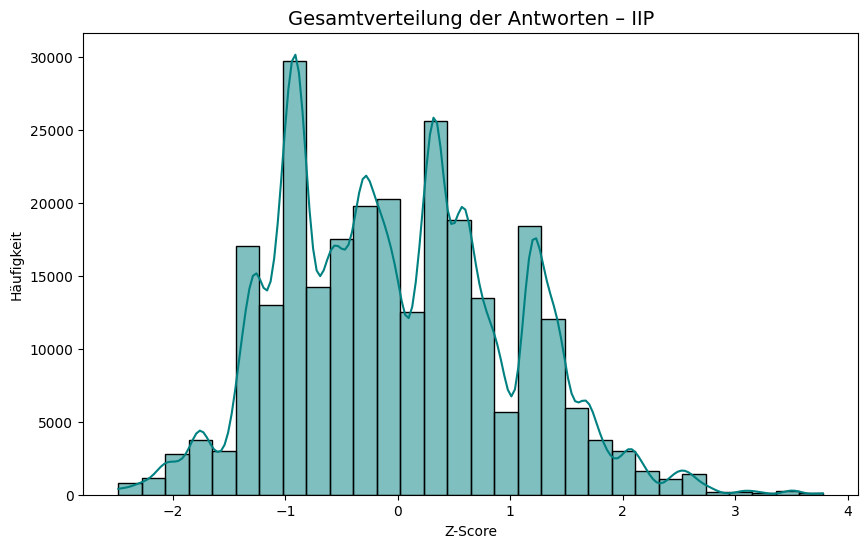

d:\CS Studium\AIN67\HiTop\Code\hitop-classification-models\src\visualization\plots.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


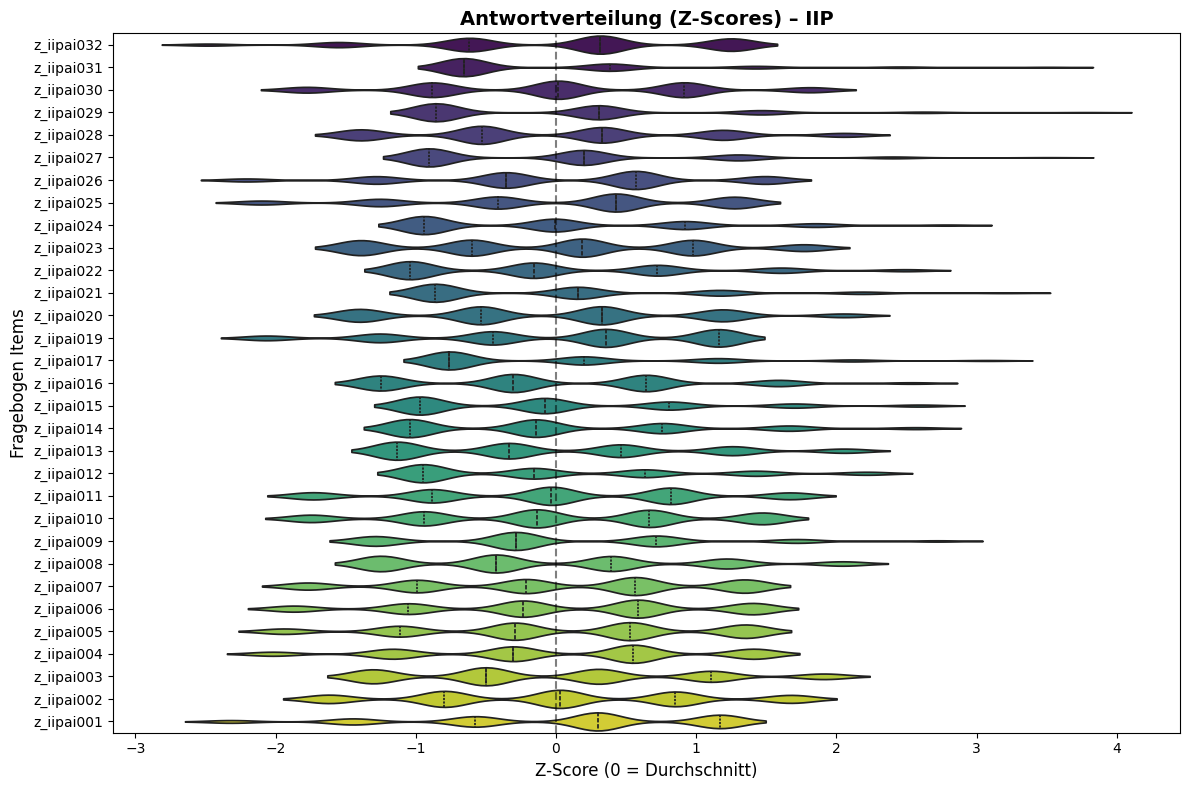

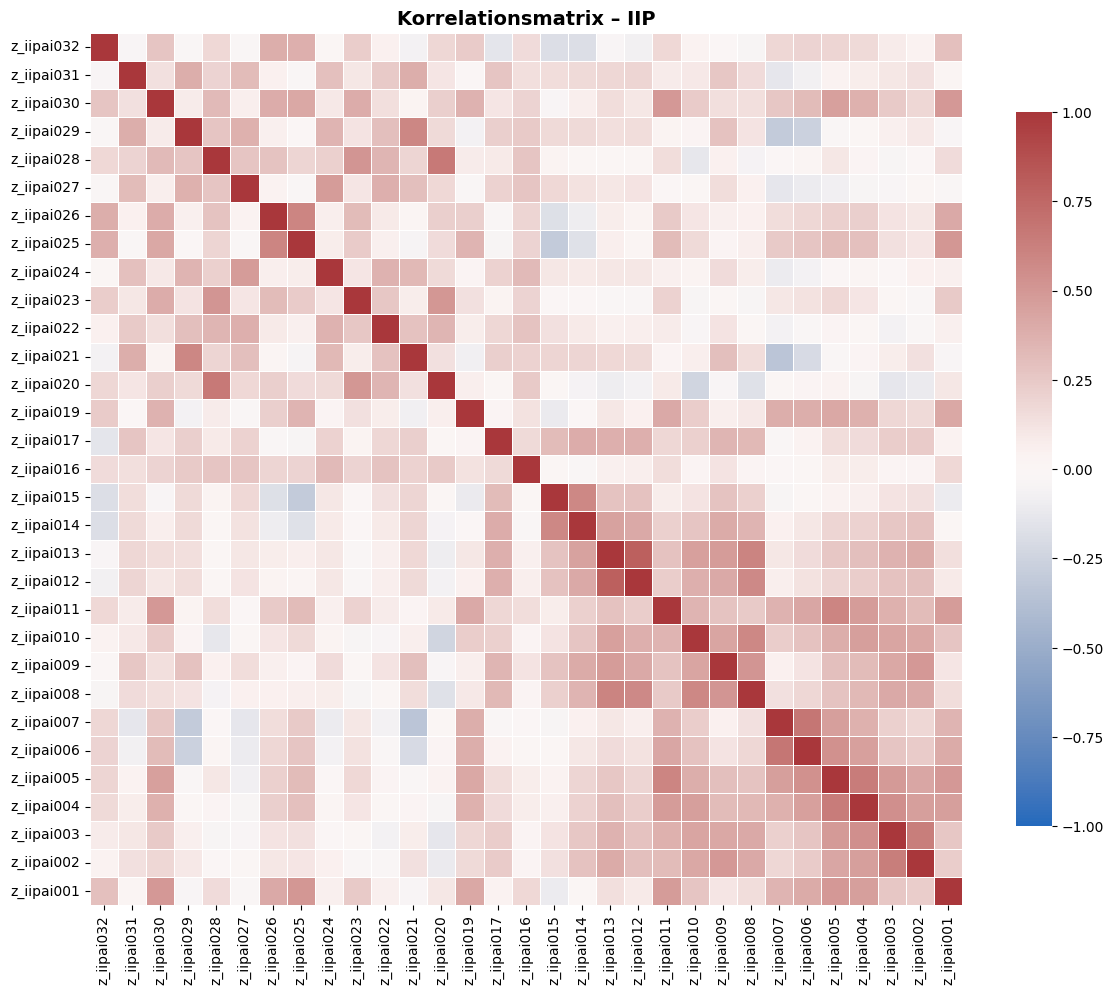

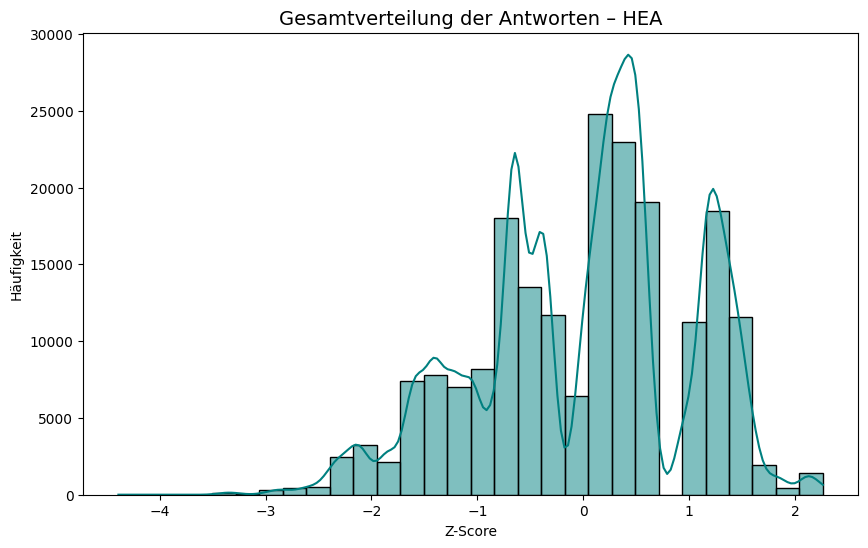

d:\CS Studium\AIN67\HiTop\Code\hitop-classification-models\src\visualization\plots.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


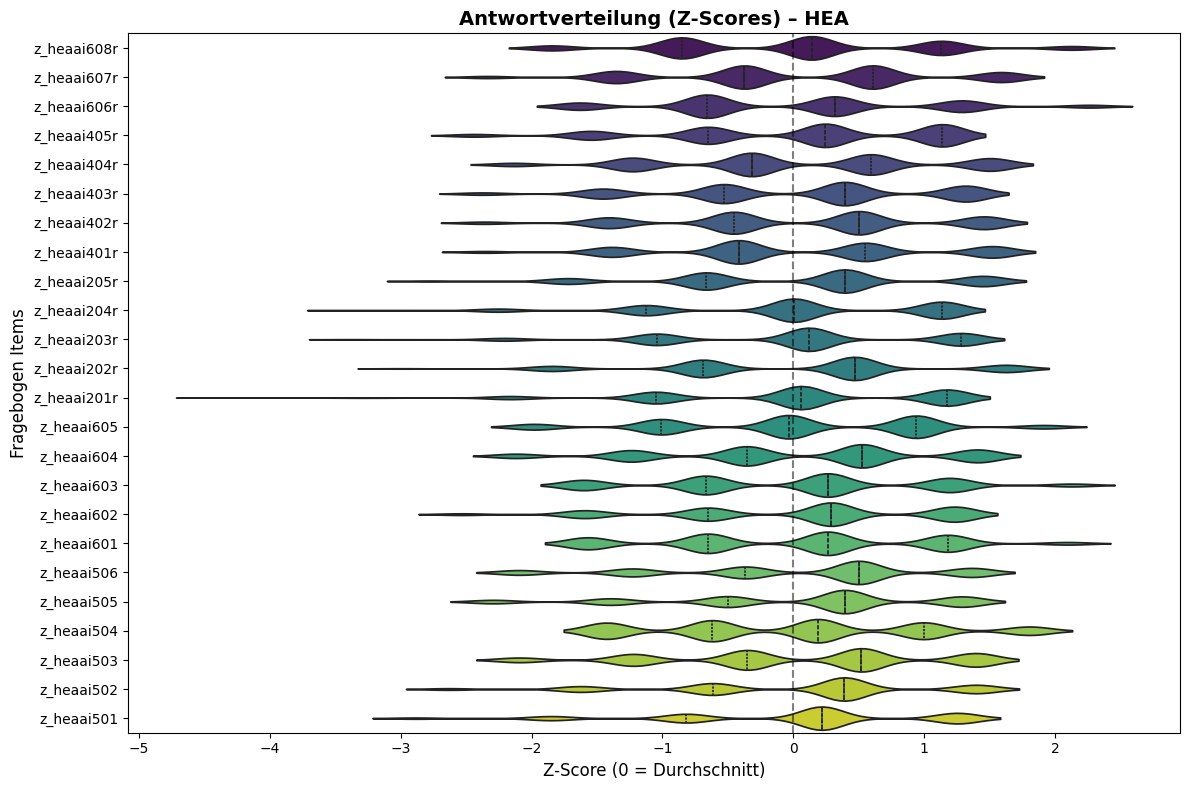

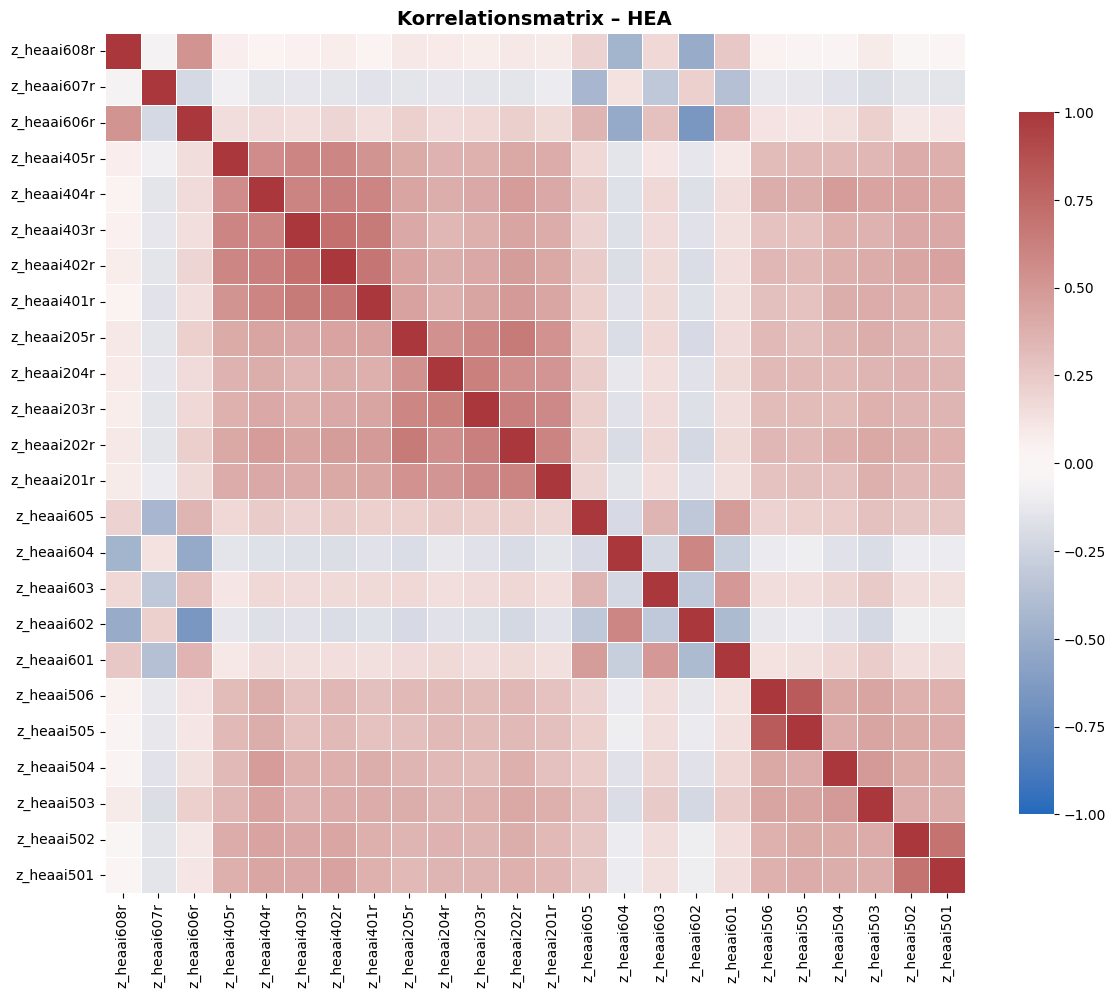

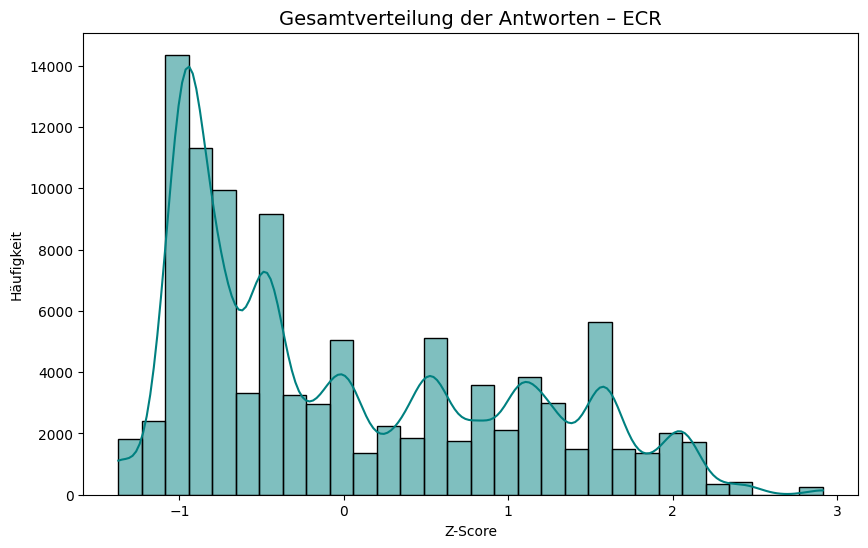

d:\CS Studium\AIN67\HiTop\Code\hitop-classification-models\src\visualization\plots.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


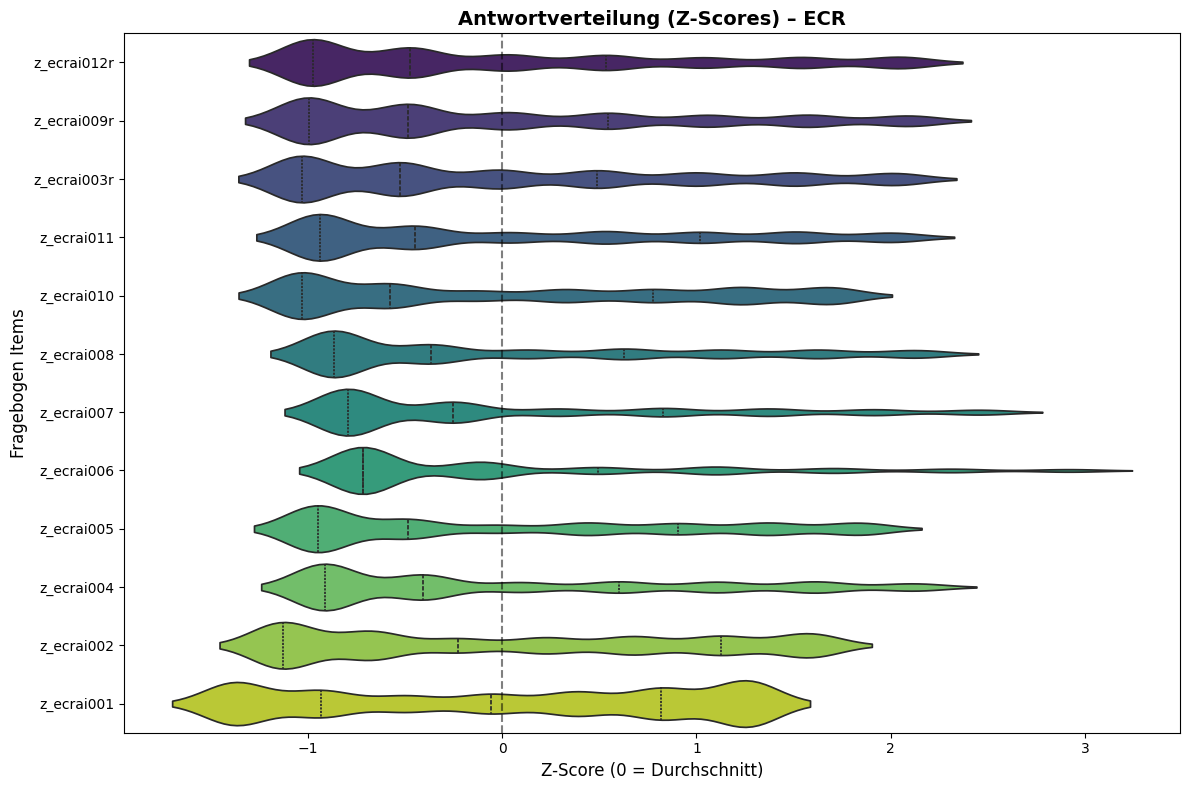

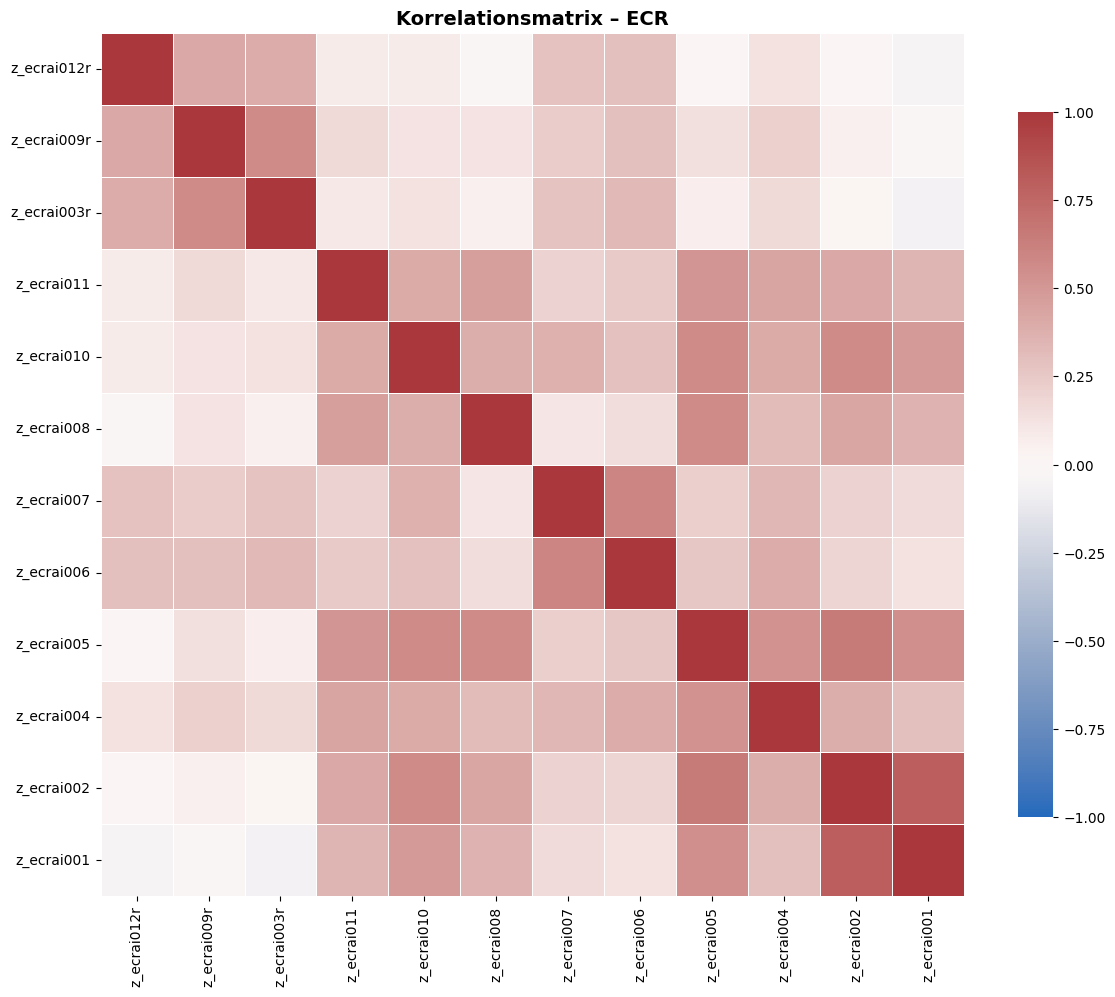

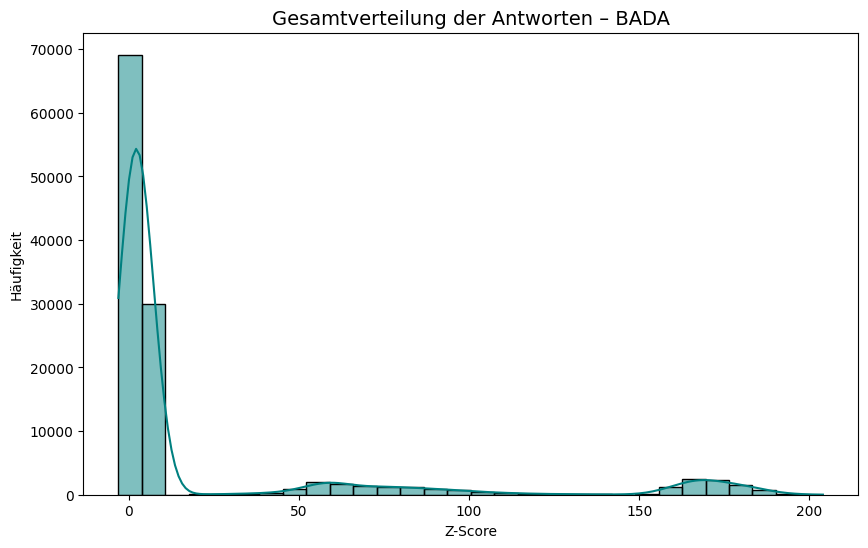

d:\CS Studium\AIN67\HiTop\Code\hitop-classification-models\src\visualization\plots.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


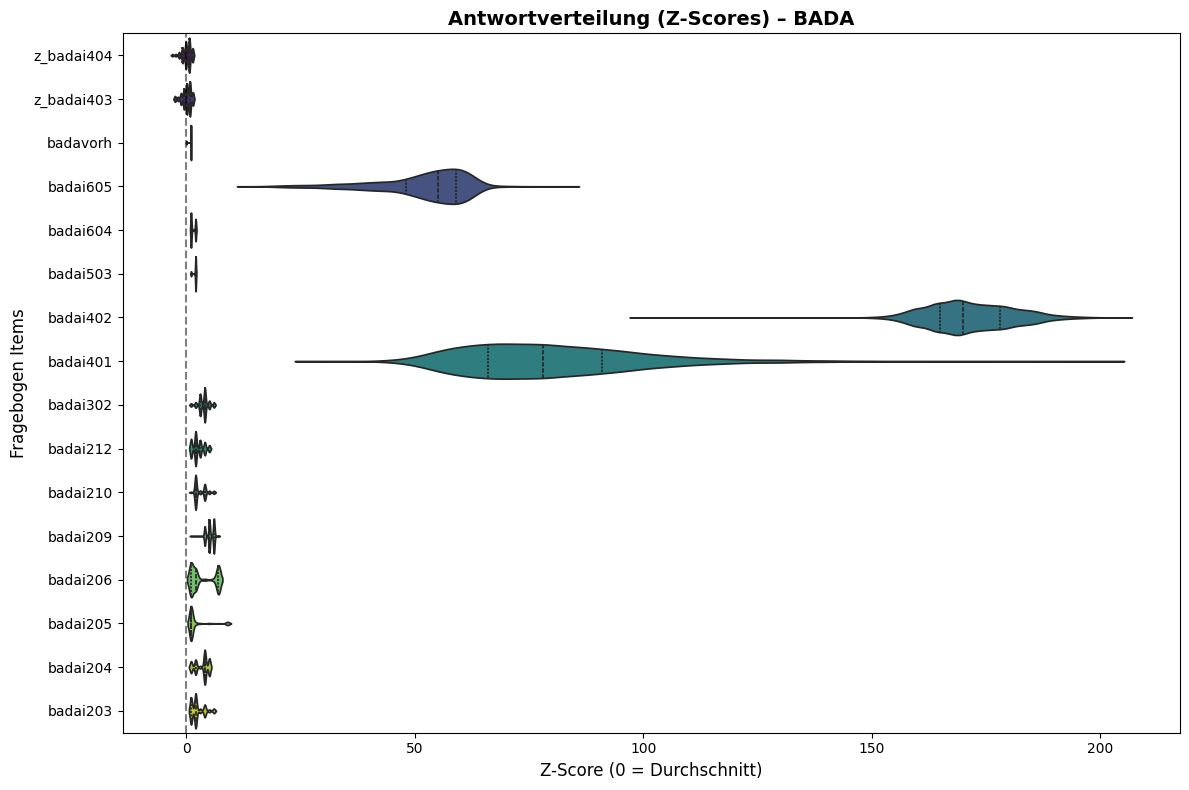

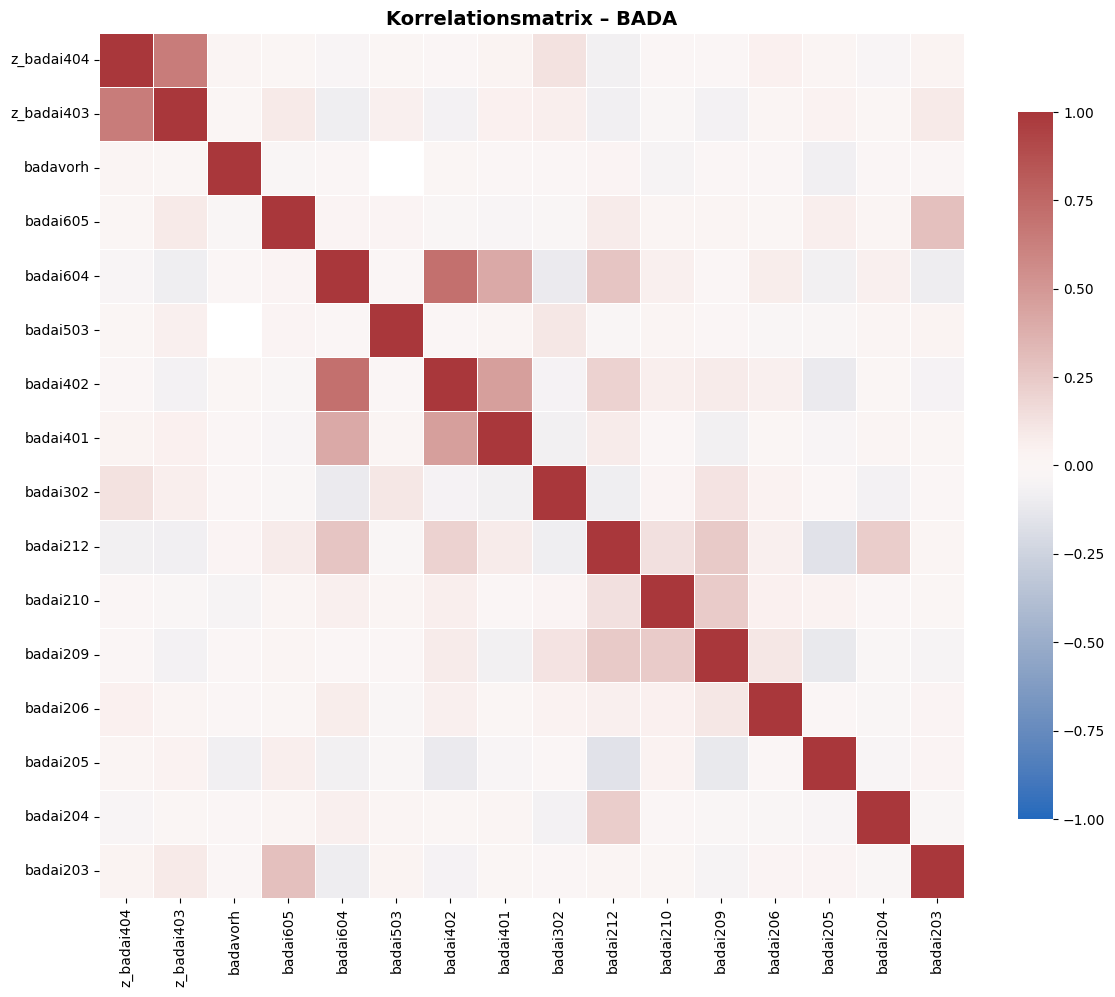

ValueError: Unable to parse string "A2 K1" at position 22255

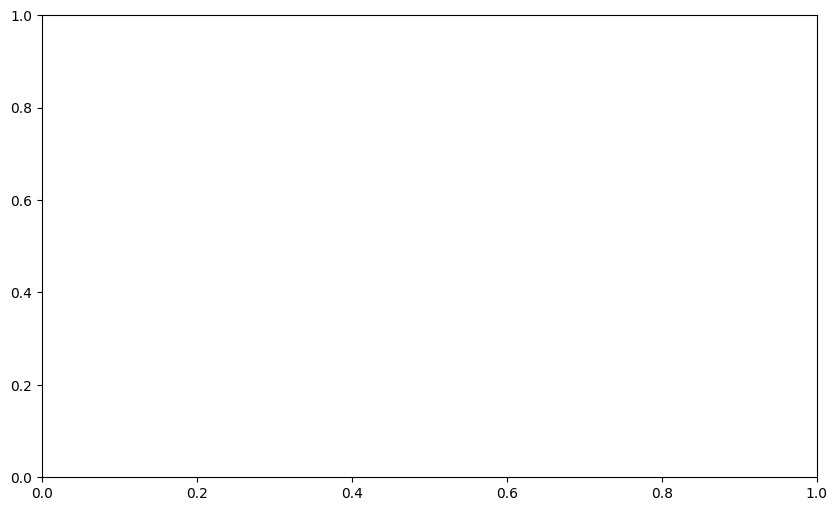

In [11]:
path = ORIGINAL_BEHAVIOR_DATASET_CSV
def clean_all_dataframes(data_dict: Dict[str, pd.DataFrame]) -> Dict[str, pd.DataFrame]:
    """
    Wendet die numerische Konvertierung (Komma zu Punkt) auf alle DataFrames im Dict an.
    Überspringt 'Metadaten', um Textspalten (Gender, Code) nicht zu zerstören.
    """
    print("Starte Bereinigung aller DataFrames...")
    
    for name, df in data_dict.items():
        # Metadaten (Texte) nicht in Zahlen zwingen, sonst gehen Infos verloren!
        if name == "Metadaten":
            print(f"ℹ️  Überspringe '{name}' (behält Text-Format).")
            continue
            
        # 1. Leere Zeilen am Ende entfernen (Wichtig!)
        original_len = len(df)
        df.dropna(how="all", inplace=True)
        
        # 2. Spalten konvertieren
        for col in df.columns:
            # Nur Strings anfassen
            if df[col].dtype == 'object':
                # Komma durch Punkt ersetzen
                df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
            
            # In Zahlen umwandeln (Text/Fehler werden zu NaN)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
        print(f"✅ {name}: Bereinigt ({len(df)} Zeilen, {df.shape[1]} Spalten)")
        
    return data_dict

# --- ANWENDUNG ---

# Dein Dictionary bereinigen

# Jetzt kannst du alles plotten, z.B.:
# _plot_correlation_heatmap(dfs_dict["SAS"], "SAS")
# _plot_correlation_heatmap(dfs_dict["PHQ"], "PHQ")


# 1. Laden (sep und decimal sind korrekt)
# 'na_values' hilft, falls leere Strings komisch kodiert sind
df = pd.read_csv(path, sep=";", decimal=",", skipinitialspace=True)

## 2. Splitten
dfs_dict = split_dataframe_auto(df)
calculate_vif_per_questionnaire(dfs_dict, 1, 50)
for key, df in dfs_dict.items():
    plot_histogram_overview(df, key)
    plot_answer_distributions(df, key)
    _plot_correlation_heatmap(df, key)